# Joe Stanley

#### ECE 525 - Homework 3

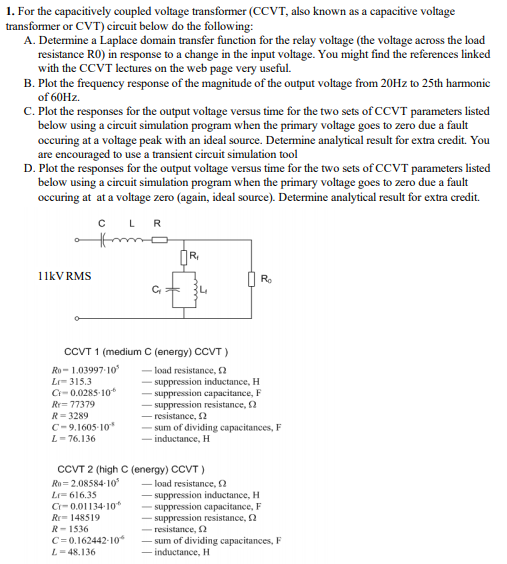

In [1]:
# Import Supporting Libraries
import numpy as np
import matplotlib.pyplot as plt
import eepower as eep
import eesignal as ees
from eepower import u,m,k,M # Unit scaling

A)

From the GE paper written by B. Kasztenny, D. Sharples, V. Asara and M. Pozzuli, we can see that the transfer function is:

$$H(s) = \frac{A_3s^3+A_2s^2+A_1s}{B_4s^4+B_3s^3+B_2s^2+B_1s+B_0}$$

where the terms are defined as:

$A_3 = L_fC_fR_fR_0C\\
A_2 = L_fR_0C\\
A_1 = R_fR_0C\\
B_4 = L_fC_f(R_f+R_0)LC\\
B_3 = LCL_f+RCL_fC_f(R_f+R_0)+L_fC_fR_fR_0C\\
B_2 = LC(R_f+R_0)+RCL_f+L_fC_f(R_f+R_0)+L_fR_0C\\
B_1 = RC(R_f+R_0)+L_f+R_fR_0C\\
B_0 = R_f+R_0$

In [2]:
# Define Function to Generate Transfer Function Terms
# Transfer function should be returned as:
# ([NUMERATOR],[DENOMINATOR])
# ie a tuple of lists describing each s-order term
def ccvttransterms(Ro,Lf,Cf,Rf,R,C,L):
    """
    ccvttransterms Function:
    
    A simple function that accepts the specifying values that
    define a capacitively coupled voltage transformer, and will
    use the arguments to develop a transfer function set (numerator,
    denominator) for use in Bode plot functions and other systems.
    
    Returns
    -------
    num:    list of float
            List of the numerator terms in traditional polynomial order.
    den:    list of float
            List of the denominator terms in traditional polynomial order.
    """
    # Define Each Term
    A3 = Lf*Cf*Rf*Ro*C
    A2 = Lf*Ro*C
    A1 = Rf*Ro*C
    A0 = 0
    B4 = Lf*Cf*(Rf+Ro)*L*C
    B3 = L*C*Lf+R*C*Lf*Cf*(Rf+Ro)+Lf*Cf*Rf*Ro*C
    B2 = L*C*(Rf+Ro)+R*C*Lf+Lf*Cf*(Rf+Ro)+Lf*Ro*C
    B1 = R*C*(Rf+Ro)+Lf+Rf*Ro*C
    B0 = Rf+Ro
    # Generate Term Lists for Transfer Function
    num = [A3,A2,A1,A0]
    den = [B4,B3,B2,B1,B0]
    return(num,den)

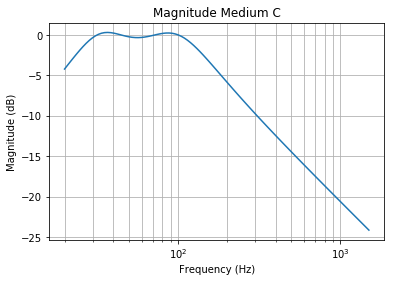

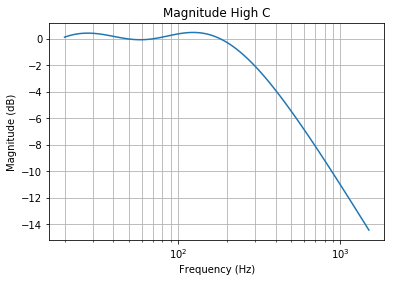

In [3]:
# B) Plot Frequency Response

# Define Givens for CCVT 1
Ro = 1.03997e5   # Ω
Lf = 315.3       # H
Cf = 0.0285e-6   # F
Rf = 77379       # Ω
R = 3289         # Ω
C = 9.1605e-8    # F
L = 76.136       # H

# Generate Transfer Function
system = ccvttransterms(Ro,Lf,Cf,Rf,R,C,L)
# Use Function to generate Bode Plot
ees.bode(system,20,25*60,angle=False,freqaxis='DEG',title="Medium C")

# Define Givens for CCVT 2
Ro = 2.08584e5   # Ω
Lf = 616.35      # H
Cf = 0.01134e-6  # F
Rf = 148519      # Ω
R = 1536         # Ω
C = 0.162442e-6  # F
L = 48.136       # H

# Generate Transfer Function
system = ccvttransterms(Ro,Lf,Cf,Rf,R,C,L)
# Use Function to generate Bode Plot
ees.bode(system,20,25*60,angle=False,freqaxis='deg',title="High C")